<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulations/blob/main/Expected_Time_Gamma_and_Weibull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.stats import weibull_min
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

In [3]:
def ET_m(m, eta, delta, alpha, beta):
    def T_m(m, eta, delta, alpha, beta):
        sum_of_y = 0
        y = weibull_min.rvs(c=beta, scale=alpha)
        sum_of_x = np.sum(np.random.gamma(eta, delta, m))
        while sum_of_x > y:
            sum_of_y = sum_of_y + y
            sum_of_x = np.sum(np.random.gamma(eta, delta, m))
            y = weibull_min.rvs(c=beta, scale=alpha)
        return(sum_of_y + sum_of_x)

    ET = np.repeat(np.nan, m)
    for i in range(m):
        T_0 = 0
        iter = 130000
        for j in range(iter):
            T_0 += T_m(i+1, eta, delta, alpha, beta)
        ET[i] = T_0/iter
    return(ET)

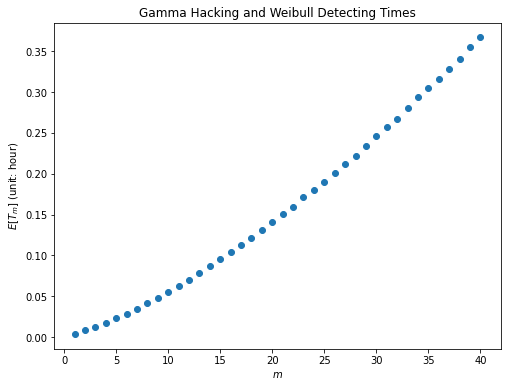

In [5]:
m = 40
eta = 0.02
delta = 0.5
alpha = 0.1
beta = 0.3
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), ET_m(m, eta, delta, alpha, beta))
plt.xlabel(r'$m$')
plt.ylabel(r'$E[T_m]$ (unit: hour)')
plt.title('Gamma Hacking and Weibull Detecting Times')
plt.show()